# import libraires

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import re
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import pickle

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
#unzip the file im colab
import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/Amazon fine food review - Sentiment analysis.zip', 'r') as zip_ref:
    zip_ref.extractall('Sentiment_analysis')

# load dataset

In [ ]:
#load dataset and
df= pd.read_csv('/content/Sentiment_analysis/Reviews.csv')
df = df[df['Score'] != 3]
#convert scores greater than 3 to 1 (positive) and less than 3 to 0 (negative)
df['Score'] = df['Score'].apply(lambda x: 1 if x > 3 else 0)
df= df[['Text','Score']]

In [4]:
#check for null values
print(df.isnull().sum())

Text     0
Score    0
dtype: int64


In [5]:
#check for duplicated records and delete it
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)

161973


In [6]:
df['Text']

,Text
0,I have bought several of the Vitality canned d...
1,Product arrived labeled as Jumbo Salted Peanut...
2,This is a confection that has been around a fe...
3,If you are looking for the secret ingredient i...
4,Great taffy at a great price. There was a wid...
...,...
568449,Great for sesame chicken..this is a good if no...
568450,I'm disappointed with the flavor. The chocolat...
568451,"These stars are small, so you can give 10-15 o..."
568452,These are the BEST treats for training and rew...


# Text preprocess

In [7]:
# covert to lowercase
df['clean_text'] = df['Text'].str.lower()
df.head()

,Text,Score,clean_text
0,I have bought several of the Vitality canned d...,1,i have bought several of the vitality canned d...
1,Product arrived labeled as Jumbo Salted Peanut...,0,product arrived labeled as jumbo salted peanut...
2,This is a confection that has been around a fe...,1,this is a confection that has been around a fe...
3,If you are looking for the secret ingredient i...,0,if you are looking for the secret ingredient i...
4,Great taffy at a great price. There was a wid...,1,great taffy at a great price. there was a wid...


In [8]:
# remove URL
def remove_url(text):
    return re.sub(r'https?://\S+|www\.\S+', '', text)

In [9]:
df['clean_text'] = df['clean_text'].apply(lambda x: remove_url(x))
df.head(25)

,Text,Score,clean_text
0,I have bought several of the Vitality canned d...,1,i have bought several of the vitality canned d...
1,Product arrived labeled as Jumbo Salted Peanut...,0,product arrived labeled as jumbo salted peanut...
2,This is a confection that has been around a fe...,1,this is a confection that has been around a fe...
3,If you are looking for the secret ingredient i...,0,if you are looking for the secret ingredient i...
4,Great taffy at a great price. There was a wid...,1,great taffy at a great price. there was a wid...
5,I got a wild hair for taffy and ordered this f...,1,i got a wild hair for taffy and ordered this f...
6,This saltwater taffy had great flavors and was...,1,this saltwater taffy had great flavors and was...
7,This taffy is so good. It is very soft and ch...,1,this taffy is so good. it is very soft and ch...
8,Right now I'm mostly just sprouting this so my...,1,right now i'm mostly just sprouting this so my...
9,This is a very healthy dog food. Good for thei...,1,this is a very healthy dog food. good for thei...


In [10]:
#remove html tags
def remove_html_tags(text):
    return re.sub(r'<.*?>', '', text)

In [11]:
df['clean_text'] = df['clean_text'].apply(lambda x: remove_html_tags(x))
df.head(25)

,Text,Score,clean_text
0,I have bought several of the Vitality canned d...,1,i have bought several of the vitality canned d...
1,Product arrived labeled as Jumbo Salted Peanut...,0,product arrived labeled as jumbo salted peanut...
2,This is a confection that has been around a fe...,1,this is a confection that has been around a fe...
3,If you are looking for the secret ingredient i...,0,if you are looking for the secret ingredient i...
4,Great taffy at a great price. There was a wid...,1,great taffy at a great price. there was a wid...
5,I got a wild hair for taffy and ordered this f...,1,i got a wild hair for taffy and ordered this f...
6,This saltwater taffy had great flavors and was...,1,this saltwater taffy had great flavors and was...
7,This taffy is so good. It is very soft and ch...,1,this taffy is so good. it is very soft and ch...
8,Right now I'm mostly just sprouting this so my...,1,right now i'm mostly just sprouting this so my...
9,This is a very healthy dog food. Good for thei...,1,this is a very healthy dog food. good for thei...


In [12]:
#remove punctuations
def remove_punctuations(text):
    punctuations = string.punctuation
    return text.translate(str.maketrans('', '', punctuations))

In [13]:
df['clean_text'] = df['clean_text'].apply(lambda x: remove_punctuations(x))
df.head(25)

,Text,Score,clean_text
0,I have bought several of the Vitality canned d...,1,i have bought several of the vitality canned d...
1,Product arrived labeled as Jumbo Salted Peanut...,0,product arrived labeled as jumbo salted peanut...
2,This is a confection that has been around a fe...,1,this is a confection that has been around a fe...
3,If you are looking for the secret ingredient i...,0,if you are looking for the secret ingredient i...
4,Great taffy at a great price. There was a wid...,1,great taffy at a great price there was a wide...
5,I got a wild hair for taffy and ordered this f...,1,i got a wild hair for taffy and ordered this f...
6,This saltwater taffy had great flavors and was...,1,this saltwater taffy had great flavors and was...
7,This taffy is so good. It is very soft and ch...,1,this taffy is so good it is very soft and che...
8,Right now I'm mostly just sprouting this so my...,1,right now im mostly just sprouting this so my ...
9,This is a very healthy dog food. Good for thei...,1,this is a very healthy dog food good for their...


In [14]:
# remove stopword
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    return " ".join([word for word in text.split() if word not in STOPWORDS])

In [15]:
df['clean_text'] = df['clean_text'].apply(lambda x: remove_stopwords(x))
df.head(25)

,Text,Score,clean_text
0,I have bought several of the Vitality canned d...,1,bought several vitality canned dog food produc...
1,Product arrived labeled as Jumbo Salted Peanut...,0,product arrived labeled jumbo salted peanutsth...
2,This is a confection that has been around a fe...,1,confection around centuries light pillowy citr...
3,If you are looking for the secret ingredient i...,0,looking secret ingredient robitussin believe f...
4,Great taffy at a great price. There was a wid...,1,great taffy great price wide assortment yummy ...
5,I got a wild hair for taffy and ordered this f...,1,got wild hair taffy ordered five pound bag taf...
6,This saltwater taffy had great flavors and was...,1,saltwater taffy great flavors soft chewy candy...
7,This taffy is so good. It is very soft and ch...,1,taffy good soft chewy flavors amazing would de...
8,Right now I'm mostly just sprouting this so my...,1,right im mostly sprouting cats eat grass love ...
9,This is a very healthy dog food. Good for thei...,1,healthy dog food good digestion also good smal...


In [16]:
#remove special characters
def remove_spl_chars(text):
    text = re.sub('[^a-zA-Z0-9]', ' ', text)
    text = re.sub('\s+', ' ', text)
    return text

In [17]:
df['clean_text'] = df['clean_text'].apply(lambda x: remove_spl_chars(x))
df.head(25)

,Text,Score,clean_text
0,I have bought several of the Vitality canned d...,1,bought several vitality canned dog food produc...
1,Product arrived labeled as Jumbo Salted Peanut...,0,product arrived labeled jumbo salted peanutsth...
2,This is a confection that has been around a fe...,1,confection around centuries light pillowy citr...
3,If you are looking for the secret ingredient i...,0,looking secret ingredient robitussin believe f...
4,Great taffy at a great price. There was a wid...,1,great taffy great price wide assortment yummy ...
5,I got a wild hair for taffy and ordered this f...,1,got wild hair taffy ordered five pound bag taf...
6,This saltwater taffy had great flavors and was...,1,saltwater taffy great flavors soft chewy candy...
7,This taffy is so good. It is very soft and ch...,1,taffy good soft chewy flavors amazing would de...
8,Right now I'm mostly just sprouting this so my...,1,right im mostly sprouting cats eat grass love ...
9,This is a very healthy dog food. Good for thei...,1,healthy dog food good digestion also good smal...


In [18]:
# count the freq for words
word_count = Counter()
for text in df['clean_text']:
    for word in text.split():
        word_count[word] += 1

word_count.most_common(10)

[('like', 151940),
 ('good', 121592),
 ('great', 106175),
 ('one', 104107),
 ('taste', 102122),
 ('product', 95849),
 ('flavor', 85403),
 ('coffee', 84983),
 ('tea', 81959),
 ('love', 79162)]

# World Cloud

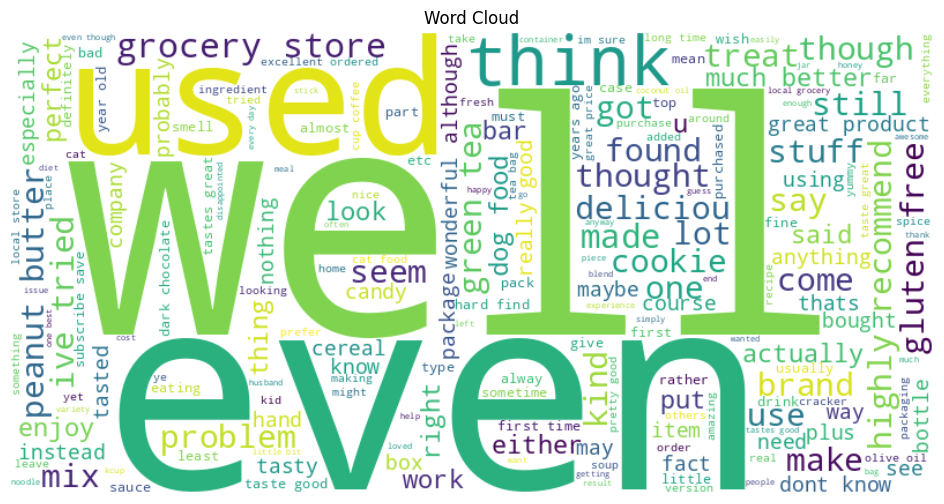

In [19]:
#visualize the world cloud
text_all = ' '.join(df['clean_text'])
wc = WordCloud(width=800, height=400, background_color='white').generate(text_all)
plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

# Naive Bayes

In [20]:
#split the text and score
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['Score'], test_size=0.2, random_state=42)

In [21]:
#print spilt shape
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (291072,)
Shape of X_test:  (72769,)


In [88]:
y_test.head()

,Score
200386,0
178087,1
118862,0
529898,0
376089,1


In [22]:
#use TF-IDF Vectorizer and then apply naive bayes
naive = Pipeline([
    ('vectorizer_tri_grams', TfidfVectorizer()),
    ('naive_bayes', (MultinomialNB()))
])

In [23]:
#train the model
naive.fit(X_train, y_train)

Pipeline(steps=[('vectorizer_tri_grams', TfidfVectorizer()),
                ('naive_bayes', MultinomialNB())])

In [24]:
#prediction
y_pred_naive = naive.predict(X_test)

In [25]:
# Calculate performance metrics
acc = metrics.accuracy_score(y_test, y_pred_naive)
prec = metrics.precision_score(y_test, y_pred_naive)
rec = metrics.recall_score(y_test, y_pred_naive)
f1 = metrics.f1_score(y_test, y_pred_naive)

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.8445
Precision: 0.8443
Recall: 1.0000
F1 Score: 0.9156


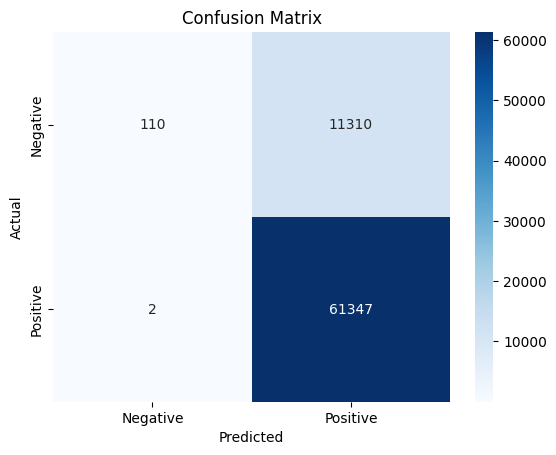

In [26]:
#vizuilaze the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred_naive)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
ax.xaxis.set_ticklabels(['Negative', 'Positive']); ax.yaxis.set_ticklabels(['Negative', 'Positive']);
plt.show()

# LSTM

In [27]:
vocab_size= 100000
max_len=200
oov_tok= "<OOV>"

#initialize tokenizer with a vocabulary size and handling out-of-vocabulary
tokenize = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

#fit the tokenizer on the text
tokenize.fit_on_texts(df['clean_text'])

#convert text to sequences of integers
sequences_train = tokenize.texts_to_sequences(df['clean_text'])

#pad the sequences
padding= pad_sequences(sequences_train, maxlen=max_len, padding='post', truncating='post')

In [28]:
#split the padded sequences and scores
X_train, X_test, y_train, y_test = train_test_split(padding, df['Score'], test_size=0.2, random_state=42)

In [29]:
#print split shape
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (291072, 200)
Shape of X_test:  (72769, 200)


In [30]:
#build network model
model = Sequential([
    layers.Embedding(vocab_size, 128, input_length=max_len),
    layers.LSTM(64, return_sequences=False),
    layers.Dropout(.5),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
    ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [31]:
# compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

In [32]:
# train the model
history=model.fit(
    X_train, y_train,
    epochs=5,
    validation_split=0.2)

Epoch 1/5
7277/7277 ━━━━━━━━━━━━━━━━━━━━ 149s 19ms/step - accuracy: 0.8443 - loss: 0.4377 - val_accuracy: 0.8429 - val_loss: 0.4366
Epoch 2/5
7277/7277 ━━━━━━━━━━━━━━━━━━━━ 200s 20ms/step - accuracy: 0.8436 - loss: 0.4341 - val_accuracy: 0.8430 - val_loss: 0.4384
Epoch 3/5
7277/7277 ━━━━━━━━━━━━━━━━━━━━ 202s 20ms/step - accuracy: 0.8690 - loss: 0.3515 - val_accuracy: 0.9291 - val_loss: 0.1840
Epoch 4/5
7277/7277 ━━━━━━━━━━━━━━━━━━━━ 201s 20ms/step - accuracy: 0.9421 - loss: 0.1526 - val_accuracy: 0.9336 - val_loss: 0.1748
Epoch 5/5
7277/7277 ━━━━━━━━━━━━━━━━━━━━ 203s 20ms/step - accuracy: 0.9615 - loss: 0.1044 - val_accuracy: 0.9313 - val_loss: 0.1921


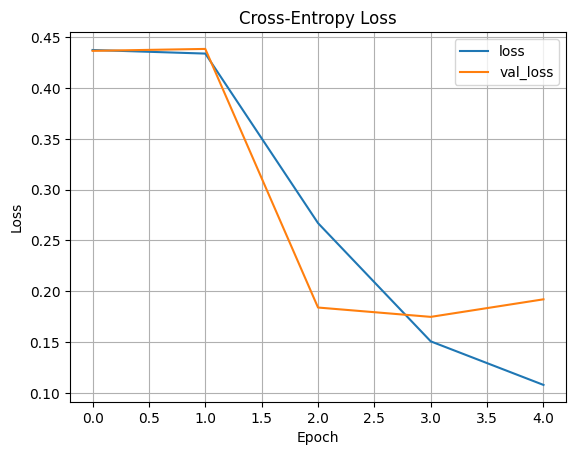

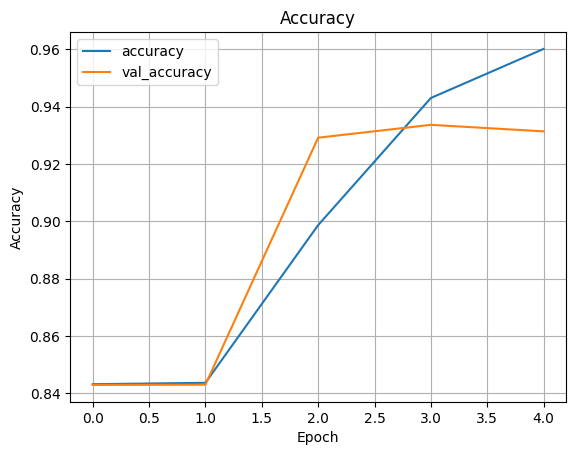

In [33]:
history_df = pd.DataFrame(history.history)

#compare the model loss against validation loss
history_df[['loss', 'val_loss']].plot(title="Cross-Entropy Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

#compare the model accuracy against the actual val accuracy
history_df[['accuracy', 'val_accuracy']].plot(title="Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [34]:
# make predictions on the test data
y_pred_lstm = model.predict(X_test).flatten()
# convert the predicted probabilities to binary sentiment
y_pred_lstm = np.where(y_pred_lstm > 0.5, 1, 0)

2275/2275 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step


In [35]:
# Calculate performance metrics
acc = metrics.accuracy_score(y_test, y_pred_lstm)
prec = metrics.precision_score(y_test, y_pred_lstm)
rec = metrics.recall_score(y_test, y_pred_lstm)
f1 = metrics.f1_score(y_test, y_pred_lstm)

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9285
Precision: 0.9437
Recall: 0.9733
F1 Score: 0.9583


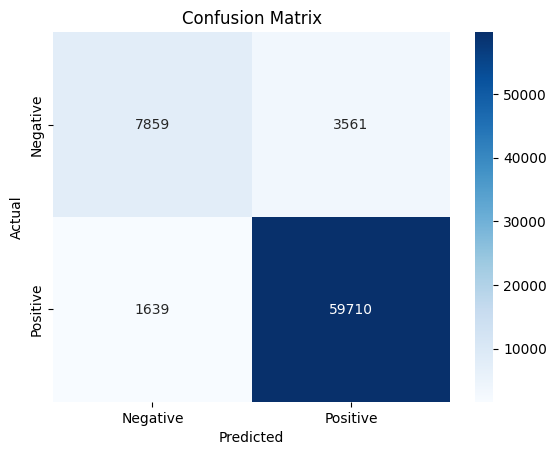

In [36]:
#vizuilaze the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred_lstm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
ax.xaxis.set_ticklabels(['Negative', 'Positive']); ax.yaxis.set_ticklabels(['Negative', 'Positive']);
plt.show()

# Save Model and Tokenizer

In [37]:
#save the model
model.save("Sentiment.h5")

In [38]:
#save the tokenizer
with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenize, f)

# Sample Predictions

In [39]:
#define a function to preprocess text
def preprocess_text(text):
    #convert to lowercase
    text= text.lower()
    #remove URL
    text= re.sub(r'https?://\S+|www\.\S+', '', text)
    #remove HTML tags
    text= re.sub(r'<.*?>', '', text)
    #remove punctuation.
    text= text.translate(str.maketrans('', '', string.punctuation))
    #remove stopwords.
    text= " ".join([word for word in text.split() if word not in STOPWORDS])
    #remove special characters
    text = re.sub('[^a-zA-Z0-9]', ' ', text)
    text = re.sub('\s+', ' ', text)
    #return the preprocessed text
    return text.strip()

In [40]:
#define a function to predict the review is positive or negative using the LSTM model
def predict(review):
    #preprocess the input
    clean_review= preprocess_text(review)
    #convert the cleaned review to a sequence of integers using the tokenizer
    sequence = tokenize.texts_to_sequences([clean_review])
    #pad the sequence
    padding= pad_sequences(sequence, maxlen=max_len, padding='post', truncating='post')
    #make a prediction
    pred= model.predict(padding)[0][0]
    #determine the sentiment based on the probability
    sentiment= "positive" if pred > 0.5 else "negative"

    #print the original review, cleaned review, predicted sentiment, and score.
    print("Review: ",review)
    print("Clean: ",clean_review)
    print(f"Sentiment: {sentiment},  Score: {pred:.4f}")

In [42]:
#define a function to predict the sentiment of a review using the Naive Bayes model
def predict_naive_bayes(review):
    #preprocess the input
    clean_review = preprocess_text(review)
    #make a prediction using the Naive Bayes
    pred_naive = naive.predict([clean_review])[0]
    #determine the sentiment based on the prediction
    sentiment_naive = "positive" if pred_naive > 0 else "negative"

    #print the original review, cleaned review, predicted sentiment, and score.
    print("Review: ", review)
    print("Clean: ", clean_review)
    print(f"Naive Bayes Sentiment: {sentiment_naive}, Score: {pred_naive:.4f}")

In [41]:
predict("If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The flavor is very medicinal.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Review:  If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The flavor is very medicinal.
Clean:  looking secret ingredient robitussin believe found got addition root beer extract ordered good made cherry soda flavor medicinal
Sentiment: negative,  Score: 0.2570


In [43]:
predict_naive_bayes("If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The flavor is very medicinal.")

Review:  If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The flavor is very medicinal.
Clean:  looking secret ingredient robitussin believe found got addition root beer extract ordered good made cherry soda flavor medicinal
Naive Bayes Sentiment: positive, Score: 1.0000


In [53]:
predict("I don't drink coffee, so my source of caffeine is diet cola, which often leaves an aftertaste.  These packets give you a great lime taste, kill the cola aftertaste, and can be conveniently carried around in a purse.  They're also great if you have concerns about the cleanliness of cut restaurant limes. Getting 500 at once is a lot, but I can't seem to find the smaller packs in stores anymore, and my friends are thrilled I have plenty to share.  Even with shipping, the 500 pack is a good deal, and the shipping was lightning fast.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Review:  I don't drink coffee, so my source of caffeine is diet cola, which often leaves an aftertaste.  These packets give you a great lime taste, kill the cola aftertaste, and can be conveniently carried around in a purse.  They're also great if you have concerns about the cleanliness of cut restaurant limes. Getting 500 at once is a lot, but I can't seem to find the smaller packs in stores anymore, and my friends are thrilled I have plenty to share.  Even with shipping, the 500 pack is a good deal, and the shipping was lightning fast.
Clean:  dont drink coffee source caffeine diet cola often leaves aftertaste packets give great lime taste kill cola aftertaste conveniently carried around purse theyre also great concerns cleanliness cut restaurant limes getting 500 lot cant seem find smaller packs stores anymore friends thrilled plenty share even shipping 500 pack good deal shipping lightning fast
Sentiment: positive,  Score: 0.9994


In [54]:
predict_naive_bayes("I don't drink coffee, so my source of caffeine is diet cola, which often leaves an aftertaste.  These packets give you a great lime taste, kill the cola aftertaste, and can be conveniently carried around in a purse.  They're also great if you have concerns about the cleanliness of cut restaurant limes. Getting 500 at once is a lot, but I can't seem to find the smaller packs in stores anymore, and my friends are thrilled I have plenty to share.  Even with shipping, the 500 pack is a good deal, and the shipping was lightning fast.")

Review:  I don't drink coffee, so my source of caffeine is diet cola, which often leaves an aftertaste.  These packets give you a great lime taste, kill the cola aftertaste, and can be conveniently carried around in a purse.  They're also great if you have concerns about the cleanliness of cut restaurant limes. Getting 500 at once is a lot, but I can't seem to find the smaller packs in stores anymore, and my friends are thrilled I have plenty to share.  Even with shipping, the 500 pack is a good deal, and the shipping was lightning fast.
Clean:  dont drink coffee source caffeine diet cola often leaves aftertaste packets give great lime taste kill cola aftertaste conveniently carried around purse theyre also great concerns cleanliness cut restaurant limes getting 500 lot cant seem find smaller packs stores anymore friends thrilled plenty share even shipping 500 pack good deal shipping lightning fast
Naive Bayes Sentiment: positive, Score: 1.0000


In [56]:
predict("I'm impressed by how much this actually looks and tastes like a real Latte when used with even just hot water (not milk!).  Some complain about the lack of coffee, but if a Latte is what I think it is, its not heavy on coffee, its more of a steamed milk thing.<br /><br />I might be wrong about that, though.<br /><br />Either way, my favorite way of having this treat is to just stir it in with some fresh hot black coffee.  Tastes great!")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Review:  I'm impressed by how much this actually looks and tastes like a real Latte when used with even just hot water (not milk!).  Some complain about the lack of coffee, but if a Latte is what I think it is, its not heavy on coffee, its more of a steamed milk thing.<br /><br />I might be wrong about that, though.<br /><br />Either way, my favorite way of having this treat is to just stir it in with some fresh hot black coffee.  Tastes great!
Clean:  im impressed much actually looks tastes like real latte used even hot water milk complain lack coffee latte think heavy coffee steamed milk thingi might wrong thougheither way favorite way treat stir fresh hot black coffee tastes great
Sentiment: positive,  Score: 0.9977


In [57]:
predict_naive_bayes("I'm impressed by how much this actually looks and tastes like a real Latte when used with even just hot water (not milk!).  Some complain about the lack of coffee, but if a Latte is what I think it is, its not heavy on coffee, its more of a steamed milk thing.<br /><br />I might be wrong about that, though.<br /><br />Either way, my favorite way of having this treat is to just stir it in with some fresh hot black coffee.  Tastes great!")

Review:  I'm impressed by how much this actually looks and tastes like a real Latte when used with even just hot water (not milk!).  Some complain about the lack of coffee, but if a Latte is what I think it is, its not heavy on coffee, its more of a steamed milk thing.<br /><br />I might be wrong about that, though.<br /><br />Either way, my favorite way of having this treat is to just stir it in with some fresh hot black coffee.  Tastes great!
Clean:  im impressed much actually looks tastes like real latte used even hot water milk complain lack coffee latte think heavy coffee steamed milk thingi might wrong thougheither way favorite way treat stir fresh hot black coffee tastes great
Naive Bayes Sentiment: positive, Score: 1.0000


In [59]:
predict("Had read about Nora products in a magazine and decide to try..not disappointed.  The brownies are delicious.  Will buy again.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
Review:  Had read about Nora products in a magazine and decide to try..not disappointed.  The brownies are delicious.  Will buy again.
Clean:  read nora products magazine decide trynot disappointed brownies delicious buy
Sentiment: positive,  Score: 0.9829


In [60]:
predict_naive_bayes("Had read about Nora products in a magazine and decide to try..not disappointed.  The brownies are delicious.  Will buy again.")

Review:  Had read about Nora products in a magazine and decide to try..not disappointed.  The brownies are delicious.  Will buy again.
Clean:  read nora products magazine decide trynot disappointed brownies delicious buy
Naive Bayes Sentiment: positive, Score: 1.0000


In [62]:
predict("This stuff shouldn't be compared with coffee and never be considered a coffee substitute. It is delicious in its own right. No caff-kick, of course; more for indulging in a peaceful cup of 'yummy.'")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Review:  This stuff shouldn't be compared with coffee and never be considered a coffee substitute. It is delicious in its own right. No caff-kick, of course; more for indulging in a peaceful cup of 'yummy.'
Clean:  stuff shouldnt compared coffee never considered coffee substitute delicious right caffkick course indulging peaceful cup yummy
Sentiment: positive,  Score: 0.9994


In [63]:
predict_naive_bayes("This stuff shouldn't be compared with coffee and never be considered a coffee substitute. It is delicious in its own right. No caff-kick, of course; more for enjoying a peaceful cup of 'yummy.'")

Review:  This stuff shouldn't be compared with coffee and never be considered a coffee substitute. It is delicious in its own right. No caff-kick, of course; more for enjoying a peaceful cup of 'yummy.'
Clean:  stuff shouldnt compared coffee never considered coffee substitute delicious right caffkick course enjoying peaceful cup yummy
Naive Bayes Sentiment: positive, Score: 1.0000


In [72]:
predict("This seems a little more wholesome than some of the supermarket brands, but it is somewhat mushy and doesn't have quite as much flavor either.  It didn't pass muster with my kids, so I probably won't buy it again.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
Review:  This seems a little more wholesome than some of the supermarket brands, but it is somewhat mushy and doesn't have quite as much flavor either.  It didn't pass muster with my kids, so I probably won't buy it again.
Clean:  seems little wholesome supermarket brands somewhat mushy doesnt quite much flavor either didnt pass muster kids probably wont buy
Sentiment: negative,  Score: 0.3270


In [73]:
predict_naive_bayes("This seems a little more wholesome than some of the supermarket brands, but it is somewhat mushy and doesn't have quite as much flavor either.  It didn't pass muster with my kids, so I probably won't buy it again.")

Review:  This seems a little more wholesome than some of the supermarket brands, but it is somewhat mushy and doesn't have quite as much flavor either.  It didn't pass muster with my kids, so I probably won't buy it again.
Clean:  seems little wholesome supermarket brands somewhat mushy doesnt quite much flavor either didnt pass muster kids probably wont buy
Naive Bayes Sentiment: positive, Score: 1.0000


In [74]:
predict("Arrived in 6 days and were so stale i could not eat any of the 6 bags!!")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Review:  Arrived in 6 days and were so stale i could not eat any of the 6 bags!!
Clean:  arrived 6 days stale could eat 6 bags
Sentiment: negative,  Score: 0.2635


In [75]:
predict_naive_bayes("Arrived in 6 days and were so stale i could not eat any of the 6 bags!!")

Review:  Arrived in 6 days and were so stale i could not eat any of the 6 bags!!
Clean:  arrived 6 days stale could eat 6 bags
Naive Bayes Sentiment: positive, Score: 1.0000


In [81]:
predict("this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Review:  this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault
Clean:  sooooo deliscious bad ate em fast gained 2 pds fault
Sentiment: positive,  Score: 0.9979


In [82]:
predict_naive_bayes("this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault")

Review:  this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault
Clean:  sooooo deliscious bad ate em fast gained 2 pds fault
Naive Bayes Sentiment: positive, Score: 1.0000
